# Задача 1.Метод неопределенных коэффициентов для уравнений переноса

![task1](task1.png)

Запишем значения с коэффициентами и разложим в Тейлора, учтем достаточно много дифф.следствий. Сразу же занулим $f(t,x)$

![](1.png)

Сделаем коэффициенты такими, чтобы последние два слагаемых превратились в исходный диффур и сократились

![](2.png)

Уже имеем три ограничения на коэффициенты и остается последнее. Есть возможность сократить предпоследние два слагаемых

![](4.png)

Итого имеем аппроксимацию $O(\Delta x^3, \Delta t^2)$

$a+b+c+d=0,a=\frac{1}{dt},c+2d=-\frac{Z}{dx},c+4d=-\frac{Z^2dt}{dx^2}$

$a=\frac{1}{dt};\;\;\;d=(-\frac{Z^2dt}{dx}+\frac{Z}{dx})/2;\;\;\;c=\frac{Z^2dt}{dx^2}-2\frac{Z}{dx};\;\;\;d=-a-b-c$

# Задача 2. XII.7.20

![second_task](second.png)

## 2.1 Дифф задача

Первая дробь - усредненная производная по времени : $\frac{u(t+dt/2,x+dx)}{2\tau}+\frac{u(t+dt/2,x)}{2\tau}$

Вторая дробь - аналогичным образом усредненная производная по пространству. Получаем уравнение вида

# $$u_t+au_x=f(t,u)$$

Т.е. приближаемая дифференциальная задача это уравнение переноса с правой частью

## 2.2 Исследование на устойчивость

Исследуем при помощи метода Неймана, подставив $y^n_k=\lambda ^ne^{i\alpha k}$ в однородное уравнение :

![second_task_solution](second_solution.jpg)

# Задача 3.XII.7.28e

![third_taskp1](third_part1.png)

![third_taskp1](third_part2.png)

_наверное в формулировке не хватает еще гран. условий в духе $u^n_0=0,\;\;u^n_{N-1}=0$_

## 3.1 Аппроксимация

Проверим аппроксимацию в промежуточных узлах : разложим в тейлора и учтем дифф. следствия

![task3_approx](task3_maple.png)

Невязка стремится к нулю по обоим переменным

Т.к. граничные условия даны как значения функции то при исследовании на аппроксимацию они будут вести себя как значения функции и следовательно для них верны выкладки как и для промежуточных узлов

Аппроксимацию показали

## 3.2 Устойчивость

Исследуем при помощи метода Неймана, подставив $y^n_k=\lambda ^ne^{i\alpha k}$ в однородное уравнение

Заметим что когда мы делаем уравнение однородным, то получаем стандартное уравнение, исследованое на семинаре, значит исследование на устойчивость можно провести аналогично семинару

На семинаре получили $\sigma \leq \frac{1}{2}$

## 3.3 Сходимость

При $\sigma \leq \frac{1}{2}$ есть аппроксимация и устойчивость, значит по теореме __Филлипова-Лакса__ метод сходится

# Задача 4. XIII.10.4ж

![task4_1](task4_part1.png)

![task4_2](task4_part2.png)

![task4_3](task4_part3.png)

### 4.0 Начальные условия

In [1]:
import numpy as np
def stolb1(x,L):
    answer=np.zeros(len(x))
    for i in range(len(x)):
        if x[i]>=L/2:
            answer[i]=2
    return answer

def stolb2(x,L):
    answer=np.zeros(len(x))
    for i in range(len(x)):
        if x[i]<=2*L/3:
            if x[i]>=L/3:
                answer[i]=2    
    return answer

In [2]:
xes=np.linspace(0,1,10)

In [3]:
stolb1(xes,1)

array([0., 0., 0., 0., 0., 2., 2., 2., 2., 2.])

In [4]:
stolb2(xes,1)

array([0., 0., 0., 2., 2., 2., 2., 0., 0., 0.])

### 4.1 Шаг по времени

### $$Y_1=x_n+\Delta t a_{11}f(T_1,Y_1)\\
Y_2=x_n+\Delta t(a_{12}f(T_1,Y_1)+a_{22}f(T_2,T_2))$$

In [5]:
import numpy as np
from scipy.optimize import fsolve
import math
a11=(3-math.sqrt(3))/6
a21=math.sqrt(3)/3
a22=a11
c1=a11
c2=(3+math.sqrt(3))/6
def rk2_implicit(state, func, dt):
    start=[np.zeros(len(state))]
    
    f_first = lambda Y1: state+dt*a11*func(Y1)-Y1
    Y1=fsolve(f_first,state)
    
    f_second = lambda Y2: state+dt*(a21*func(Y1)+a22*func(Y2))-Y2
    Y2=fsolve(f_second,state)
    story=[Y1,Y2]
#    print(Y1,Y2)
    return state+dt*(1/2*func(Y1)+1/2*func(Y2))

RK4

In [6]:
def rk4(state, func, dt):
    Y=[0,0,0,0]
    Y[0]=state
    Y[1]=state+dt/2*func(Y[0])
    Y[2]=state+dt/2*func(Y[1])
    Y[3]=state+dt*func(Y[2])
    return state+dt/6*(func(Y[0])+2*func(Y[1])+2*func(Y[2])+func(Y[3]))

### 4.2 Шаг по пространству

Для шага по пространству будем приближать вторую производную следующим образом :

### $$\frac{\partial^2u}{\partial x^2} \approx \frac{u(x+\Delta x)-2u(x)+u(x-\Delta x)}{\Delta x ^2}$$

Реализуем соответствующую функцию :

In [7]:
def central_diff_second_der(f,dx):
    diff_f=np.empty_like(f)
    for i in range(1,f.size-1):
        diff_f[i]=(f[i+1]-2*f[i]+f[i-1])/dx/dx
    return diff_f

### 4.3 Точное решение

Точное решение выражается рядом 

$$u(x,t)=\sum\limits_{n=1}^{\infty}\alpha_n \exp(-\frac{\pi^2 n^2 kt}{a^2})\sin \frac{\pi n x}{a}$$

С коэффициентами, вычисляемыми по формуле

$$\alpha_n=\frac{2}{a}\int\limits_{0}^a \phi(x)\sin \frac{\pi n x}{a}dx$$

В задаче предлагается рассмотреть случай когда $\phi(x)$ - ступенька высотой 2 с середины отрезка и до конца и случай, когда $\phi(x)$ - ступенька высотой 2, занимающая вторую треть отрезка

Посчитаем эти интегралы руками руками : 

![task4_integral1](task4_integral1.png)

![task4_integral2](task4_integral2.png)

In [8]:
import numpy as np
N=400 # Число слагаемых ряда
a1=np.zeros(N)
a2=np.zeros(N)
a1[0]=0
a2[0]=0
for n in range(1,N):
    a1[n]=4*(np.cos(np.pi*n/2)-np.cos(np.pi*n))/np.pi/n
    a2[n]=4*(np.cos(np.pi*n/3)-np.cos(2*np.pi*n/3))/np.pi/n

In [9]:
def compute_x(t,L,nx,coef=a1,KO=1):
    N=len(coef)
    xes=np.linspace(0,L,nx+1)
    summ=np.zeros(nx+1)
    for n in range(1,N):
        summ+=coef[n]*np.exp(-np.pi**2*n**2*KO*t/L/L)*np.sin(np.pi*n*xes/L)
    return summ

In [10]:
def solveDiffusion(u0,coefficients, timeMethod, spaceMethod, nx = 100, nt = 200, L = 1.0, T = 1.0, KO = 1.0,):
    """
    Входные аргументы:
    u0 -- функция для вычисления начального значения u(t=0,x)
    timeMethod -- функция, метод интегрирования по времени
    spaceMethod -- функция, метод аппроксимации du/dx
    nx -- индекс последнего узла сетки x_i по пространству. i = 0 ... nx, x_0 = x_nx, т.к. отрезок периодический.
    nt -- индекс последнего узла сетки t_i по времени. i = 0 ... nt, t_nt = T
    L -- длина отрезка по пространству
    T -- до какого момента времени производить интегрирование
    K0 -- коэффициент теплопроводности
    """
    
    # параметры пространственной сетки
    dx = L / nx
    x = np.arange(0, nx + 1) * dx
    # параметры временной сетки
    dt = T / nt
    t = np.arange(0, nt + 1) * dt
    # число Куранта
    CFL = KO * dt / dx**2
    print(f"Число Куранта CFL = {CFL}")
    
    # инициализируем массивы для хранения численного и точного решения во все моменты времени
    u = np.zeros((nt+1, nx+1))
    uExact = np.zeros((nt+1, nx+1))
    # задаем решение в начальный момент времени
    u[0,:] = u0(x,L)
    left=u[0][0]
    right=u[0][0]
    uExact[0,:] = u0(x,L)
    # цикл по времени
    for k in range(nt):
        u[k+1,:] = timeMethod(u[k,:], lambda u: KO*spaceMethod(u, dx), dt)
        u[k+1][0]=left
        u[k+1][-1]=right
        uExact[k+1, :] = compute_x(dt*k,L,nx,coefficients,KO)
    return u, uExact, x, t
#    return u,x,t

In [11]:
# Подключаем необходимые пакеты
import numpy as np    
import matplotlib.pyplot  as plt
from matplotlib import animation
%matplotlib notebook

def animateDiffusion(u, uExact, x, t, animSpeed = 1,name='default_name'):
#    plt.ioff()
    fig, ax = plt.subplots()
    line1, = ax.plot(x, u[0,:], label = "Numerical Solution")
    line2, = ax.plot(x,uExact[0,:], label = "Exact Solution") 
    lines = (line1, line2)
    
    fig.legend(loc = 8, ncol = 2) 
    fig.tight_layout()
    fig.subplots_adjust(bottom=0.15)
    
    height = np.max(np.abs(u[0,:]))
    ax.set_ylim(np.min(u[0, :]) - 0.2 * height, np.max(u[0, :]) + 0.2 * height)

    time_template = 'time = %.4fs'
    time_text = ax.text(0.05, 0.9, '', transform=ax.transAxes)
    
    def init():
        return lines
    
    def animate(n):
        nAnim = animSpeed * n
        lines[0].set_ydata(u[nAnim,:])
        lines[1].set_ydata(uExact[nAnim,:])
        time_text.set_text(time_template % (t[nAnim]))
        return lines, time_text

    anim = animation.FuncAnimation(fig, animate,init_func=init, frames=len(t), interval=20,repeat_delay=2000, repeat = True, blit=True)
#    anim.save(name+".gif", writer='imagemagick')
    return anim

In [12]:
# Подключаем необходимые пакеты
import numpy as np    
import matplotlib.pyplot  as plt
from matplotlib import animation
%matplotlib notebook

def animateDiffusion(u, uExact, x, t, animSpeed = 1,name='default_name'):
#    plt.ioff()
    fig, ax = plt.subplots()
    line1, = ax.plot(x, u[0,:], label = "Numerical Solution")
    line2, = ax.plot(x,uExact[0,:], label = "Exact Solution") 
    lines = (line1, line2)
    
    fig.legend(loc = 8, ncol = 2) 
    fig.tight_layout()
    fig.subplots_adjust(bottom=0.15)
    
    height = np.max(np.abs(u[0,:]))
    ax.set_ylim(np.min(u[0, :]) - 0.2 * height, np.max(u[0, :]) + 0.2 * height)

    time_template = 'time = %.4fs'
    time_text = ax.text(0.05, 0.9, '', transform=ax.transAxes)
    
    def init():
        return lines
    
    def animate(n):
        nAnim = animSpeed * n
        lines[0].set_ydata(u[nAnim,:])
        lines[1].set_ydata(uExact[nAnim,:])
        time_text.set_text(time_template % (t[nAnim]))
        return lines, time_text

    anim = animation.FuncAnimation(fig, animate,init_func=init, frames=len(t), interval=20,repeat_delay=2000, repeat = True, blit=True)
#    anim.save(name+".gif", writer='imagemagick')
    return anim

## 4.4 Тесты

__!!!Если с анимациями какие-то проблемы то надо перекомпилить блок!!!__

### Для примера - решение при помощи RK4 первой функции

для него на семинаре получали $4\sigma\leq2.7$, т. е. $\sigma < 0.675$

Число Куранта CFL = 0.6


<IPython.core.display.Javascript object>


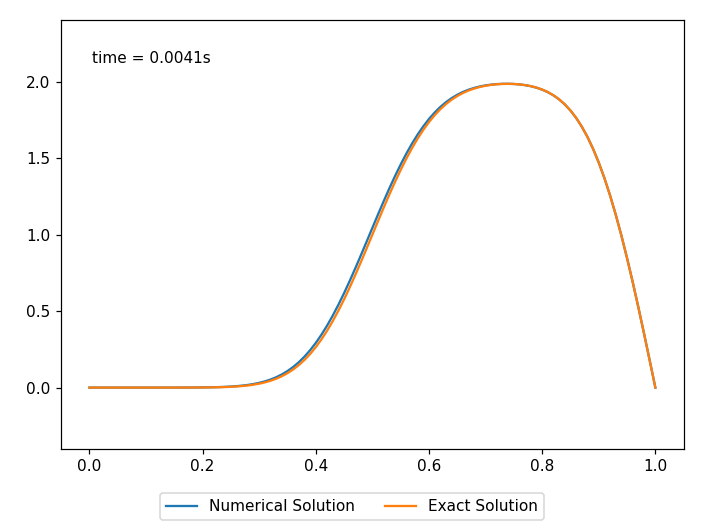

In [57]:
u, uExact, x, t=solveDiffusion(stolb1,a1, rk4, central_diff_second_der, nx = 100, nt = 100, L = 1, T = 0.006, KO = 1)
anim = animateDiffusion(u, uExact, x, t,name="rk4")

Число Куранта CFL = 0.7000000000000001


<IPython.core.display.Javascript object>


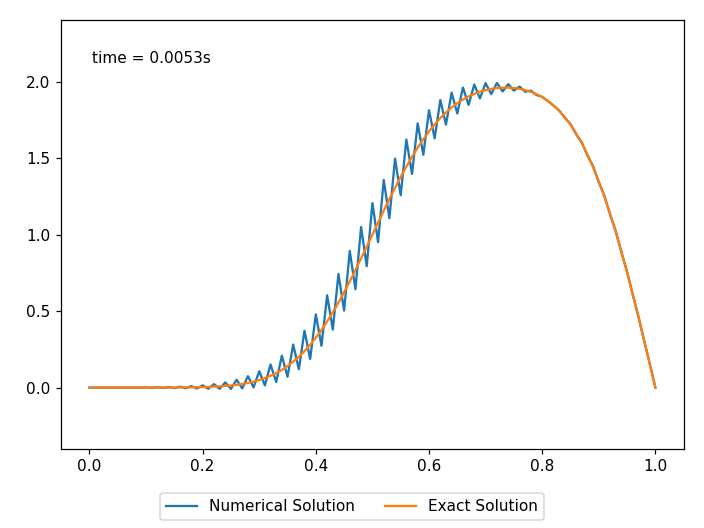

In [58]:
u, uExact, x, t=solveDiffusion(stolb1,a1, rk4, central_diff_second_der, nx = 100, nt = 100, L = 1, T = 0.007, KO = 1)
anim = animateDiffusion(u, uExact, x, t,name="rk4")

## Теперь наш метод

### Первая функция

Число Куранта CFL = 1.0


<IPython.core.display.Javascript object>


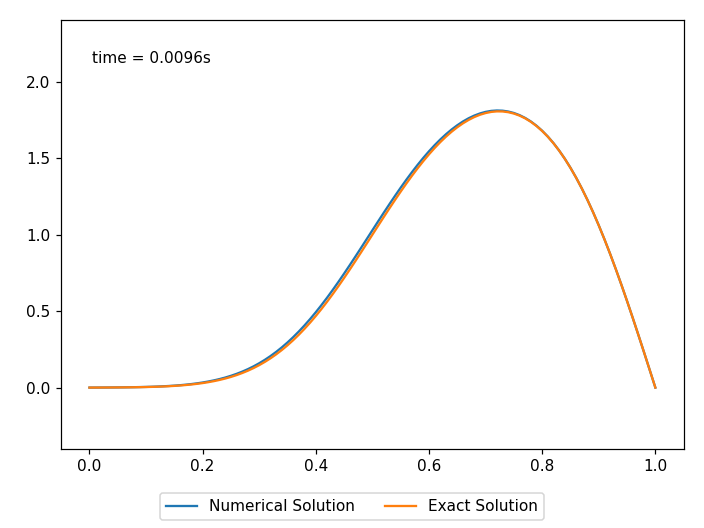

In [61]:
u, uExact, x, t=solveDiffusion(stolb1,a1, rk2_implicit, central_diff_second_der, nx = 100, nt = 100, L = 1, T = 0.01, KO = 1)
anim = animateDiffusion(u, uExact, x, t,name="rk2_implicit1")

### Вторая функция

In [60]:
u, uExact, x, t=solveDiffusion(stolb2,a2, rk2_implicit, central_diff_second_der, nx = 100, nt = 100, L = 1, T = 0.01, KO = 1)
anim = animateDiffusion(u, uExact, x, t,name="rk2_implicit2")

Число Куранта CFL = 1.0


KeyboardInterrupt: 

# Порядок сходимости по пространству

In [53]:
def get_norm(u,uExact,dx): #Считаем L_1^h норму разности точного и численного решений
    numerical=u[-1]
    exact=uExact[-1]
    nx=len(numerical)
    dif=np.abs(numerical-exact)
    dif*=dx
    return np.sum(dif)

In [54]:
norms=[]
xes=[20,40,80,100,160]
L=1
for number in xes:
    u,uExact,x,t=solveDiffusion(stolb2,a2, rk2_implicit, central_diff_second_der, nx = number, nt = 50, L = L, T = 0.001, KO = 1)
    norms.append(get_norm(u,uExact,L/number))

Число Куранта CFL = 0.007999999999999998
Число Куранта CFL = 0.031999999999999994
Число Куранта CFL = 0.12799999999999997
Число Куранта CFL = 0.2
Число Куранта CFL = 0.5119999999999999


In [55]:
norms

[0.034059631299104616,
 0.01680324110461026,
 0.008377415389495314,
 0.006701205962012,
 0.004207429393729712]

In [56]:
plt.close()
plt.plot(xes,norms)
plt.xlabel("Число точек в пространственной сетке")
plt.ylabel("Норма разности точного решения и численного")

Text(19.9764,0.5,'Норма разности точного решения и численного')

In [48]:
normslog=np.log(norms)
xeslog=np.log(xes)
print("Порядок сходимости по пространству = {}".format(np.polyfit(xeslog, normslog, 1)[0]))

Порядок сходимости по пространству = -1.0060218997965467


Это странно, когда я беру центральную разность для аппроксимации второй производной, порядок должен быть 2. Возможно это связано с тем, какая норма была взята